I collected 1,000 records from Web of Science related to biodiversity. I want to explore how to quickly identify topics within the sample with the eventual goal of mapping these topics across a world map.

In [1]:

import pandas as pd

data=pd.read_csv("Dataset for Class.csv",
                 usecols=['Article Title','Source Title','Author Keywords','Abstract','Addresses','Times Cited, All Databases'])
print(data)

                                         Article Title  \
0    Land enrolled in the Conservation Reserve Prog...   
1    Fish Biodiversity Conservation and Restoration...   
2    Operationalizing ecological connectivity in sp...   
3    Spatial conservation planning with ecological ...   
4    A landscape index of ecological integrity to i...   
..                                                 ...   
995            Disturbance Ecology in the Anthropocene   
996  Integrating socio-ecological dynamics into lan...   
997  Persistence through tough times: fixed and shi...   
998  Can local ecological knowledge provide meaning...   
999  Shifts in habitat suitability and the conserva...   

                           Source Title  \
0       GLOBAL ECOLOGY AND CONSERVATION   
1                                 WATER   
2      METHODS IN ECOLOGY AND EVOLUTION   
3               BIOLOGICAL CONSERVATION   
4                     LANDSCAPE ECOLOGY   
..                                  ...   
99

Now, I'm just going to look at the most common tokens in keywords, abstracts, and titles

In [2]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

#for text wrapping
import textwrap

import matplotlib.pyplot as plt

import numpy as np
import scipy

sw = stopwords.words("english")

In [4]:
data['Author Keywords']

0      Conservation Reserve Program; Discrete choice ...
1      conservation; ecological integrity; fish biodi...
2      decision support software; demographic; ecolog...
3      Conservation feedbacks; Dynamic spatial priori...
4      Landscape pattern; Landscape metrics; Ecologic...
                             ...                        
995    anthropogenic change; disturbance ecology; dis...
996    Tree farms; Socio-Ecological; Dyna-CLUE; InVES...
997    Endangered species; Biodiversity conservation;...
998    Hainan; Indo-Pacific humpback dolphin; Questio...
999    Andes; conservation planning; climate change; ...
Name: Author Keywords, Length: 1000, dtype: object

# Most Common Author Keywords
    

In [5]:
keywords=data['Author Keywords'] ##saving just the keywords column

In [6]:
word_dat=[] ##creating a list to store string of data

for item in keywords:  #Make everything in the column  a string of text
    string=str(item)
    word_dat.append(string)
    
len(word_dat)
#word_dat[1:3]

1000

In [7]:
tokens=nltk.word_tokenize(str(word_dat)) ##tokenize all of the text strings
len(tokens) #How many tokens are there??
#19,176 tokens

19176

In [8]:
cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [9]:
len(cleaned_tokens) #Now we are at 10,019 tokens
cleaned_tokens[1:15]

['program',
 'discrete',
 'choice',
 'model',
 'lesser',
 'movement',
 'ecology',
 'nocturnal',
 'ecology',
 'roost',
 'sites',
 'tympanuchus',
 'pallidicinctus',
 'ecological']

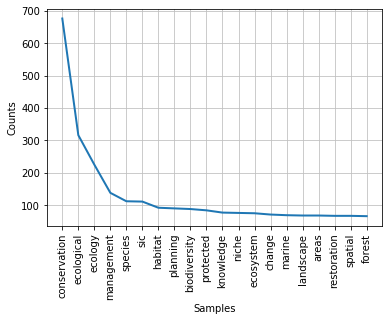

In [10]:
#Visualizing the most common keywords

fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)


# Most common words in abstracts

In [3]:
abstract=data['Abstract']

word_dat=[] ##creating a list to store string of data

for item in abstract:  #Make everything in the column  a string of text
    string=str(item)
    word_dat.append(string)
    
len(word_dat)   
word_dat[1]

'Although many significant policies and legislation have been put forth by the Chinese government aiming toward ecological civilization for the aquatic environment, in practice, the situation is still undesirable. A pioneering multi-year study has since been conducted on the East Tiaoxi River (a major tributary of the renowned Yangtze River), focusing on fish distribution, influencing factors and habitat requirements, and river health as well. This revealed certain key species, hotspot protection areas, negative impacts of local anthropogenic activities, and inappropriate perceptions and practices of conservation and restoration. We found that not all fish species were equally conserved and that the supposedly ecological engineering measures were initiated without regard for ecological integrity. Our exemplary study appreciates scientific basis and truly ecological notion, and urgently advocates comprehensive and continuous basin-scale scientific investigation of fish biodiversity, and

In [12]:
tokens=nltk.word_tokenize(str(word_dat)) ##tokenize all of the text strings
len(tokens)

#There are currently 269,378 tokens

cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [13]:
len(cleaned_tokens)
##there are now 148,105 tokens
cleaned_tokens[1:20]

['animals',
 'must',
 'select',
 'sites',
 'rest',
 'may',
 'spend',
 'large',
 'portion',
 'lives',
 'despite',
 'importance',
 'period',
 'daily',
 'activity',
 'budget',
 'lack',
 'information',
 'ecology']

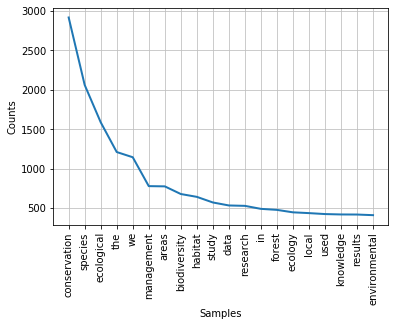

In [15]:
fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)

## Removing words that appear with very large frequency and very low frequency
There are a lot of words that have a high frequency given we only have 1,000 abstracts. I want to see what will happen with topic models with every word in the model and with high frequency words removed. I want to see what makes abstracts unique. Therefore, I want to try removing words that appear more than 1,000 times and less than 10 times.

In [14]:
# using Counter() + list comprehension

removed=[]
upper=1000
lower=10

freq=Counter(cleaned_tokens)
freq

filtered_tokens= [ele for ele in cleaned_tokens if freq[ele] < upper]
filtered2_tokens= [ele for ele in filtered_tokens if freq[ele] > lower]
#Counter(filtered2_tokens)

In [15]:
#removed words
removed=[ele for ele in cleaned_tokens if freq[ele] > upper]
removed.append([ele for ele in cleaned_tokens if freq[ele] < lower])

In [16]:
#removed

## Looking at common bigrams (pairs of words)

In [6]:
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
bigrams=[]

for abstract in word_dat:
    tokens = word_tokenize(abstract)
    tokens = [t for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    bi_grams = list(ngrams(tokens, 2))
    
    
    bigrams.append(bi_grams)

len(bigrams)
#bigrams ##currently bigrams is a list of lists of bigrams

1000

In [18]:
# how to flatten list of lists
 
# using list comprehension
all_bigrams = [item for sublist in bigrams for item in sublist]
all_bigrams

# counting all bigrams
counter = Counter(all_bigrams)
counter.most_common(30)
#counter

[(('protected', 'area'), 215),
 (('biodiversity', 'conservation'), 163),
 (('climate', 'change'), 163),
 (('ecosystem', 'service'), 145),
 (('The', 'result'), 122),
 (('conservation', 'planning'), 97),
 (('This', 'study'), 96),
 (('conservation', 'management'), 90),
 (('case', 'study'), 89),
 (('We', 'found'), 88),
 (('Our', 'result'), 87),
 (('ecological', 'conservation'), 78),
 (('conservation', 'strategy'), 77),
 (('We', 'used'), 76),
 (('ecological', 'niche'), 75),
 (('land', 'use'), 73),
 (('conservation', 'effort'), 71),
 (('ecological', 'knowledge'), 69),
 (('conservation', 'status'), 69),
 (('specie', 'richness'), 66),
 (('water', 'conservation'), 65),
 (('Published', 'Elsevier'), 64),
 (('conservation', 'action'), 63),
 (('In', 'addition'), 62),
 (('human', 'activity'), 60),
 (('We', 'also'), 59),
 (('natural', 'resource'), 59),
 (('In', 'study'), 57),
 (('study', 'area'), 57),
 (('conservation', 'area'), 56)]

In [19]:
len(all_bigrams)

147693

In [21]:
##Removing some irrelevant bigrams

bad_bigrams=[('We', 'also'), ('In', 'study'),('In', 'addition'),('We', 'used'),('Published', 'Elsevier'),
('Our', 'result'),('We', 'found'),('The', 'result'),('This', 'study')]

clean_bigrams = []
for bigram in all_bigrams:
    if bigram not in bad_bigrams:
        clean_bigrams.append(bigram)

# Creating World Cloud Visualizations

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

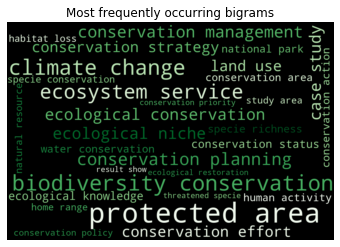

In [29]:

dictionary2 = [' '.join(tup) for tup in clean_bigrams]
#print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 30
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,colormap='Greens') #,stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

# Looking at trigrams


In [30]:
trigrams=[]

for abstract in word_dat:
    tokens = word_tokenize(abstract)
    tokens = [t for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    tri_grams = list(ngrams(tokens, 3))
    
    
    trigrams.append(tri_grams)

len(trigrams)
#bigrams ##currently trigrams is a list of lists of trigrams

1000

In [31]:
# flatten list of lists
 
# using list comprehension
all_trigrams = [item for sublist in trigrams for item in sublist]
all_trigrams

# counting all bigrams
counter = Counter(all_trigrams)
counter.most_common(30)
#counter

[(('The', 'Authors', 'Published'), 34),
 (('Authors', 'Published', 'Elsevier'), 34),
 (('The', 'result', 'show'), 29),
 (('C', 'The', 'Authors'), 27),
 (('local', 'ecological', 'knowledge'), 24),
 (('ecological', 'niche', 'model'), 22),
 (('home', 'range', 'size'), 20),
 (('soil', 'water', 'conservation'), 20),
 (('marine', 'protected', 'area'), 20),
 (('All', 'right', 'reserved'), 19),
 (('IUCN', 'Red', 'List'), 18),
 (('natural', 'resource', 'management'), 18),
 (('traditional', 'ecological', 'knowledge'), 17),
 (('Elsevier', 'All', 'right'), 16),
 (('The', 'result', 'showed'), 16),
 (('priority', 'conservation', 'area'), 15),
 (('specie', 'conservation', 'concern'), 14),
 (('C', 'Elsevier', 'All'), 14),
 (('play', 'important', 'role'), 14),
 (('Our', 'result', 'show'), 14),
 (('Our', 'result', 'suggest'), 14),
 (('The', 'result', 'study'), 14),
 (('Brasileira', 'de', 'Ciencia'), 13),
 (('de', 'Ciencia', 'Ecologica'), 13),
 (('Ciencia', 'Ecologica', 'e'), 13),
 (('ecological', 'niche

In [32]:
len(all_trigrams)

146696

In [35]:
bad_trigrams=[('Ciencia', 'Ecologica', 'e'),('de', 'Ciencia', 'Ecologica'),('Brasileira', 'de', 'Ciencia'),('The', 'result', 'study'),
             ('Our', 'result', 'suggest'),('Our', 'result', 'show'),('play', 'important', 'role'), ('Elsevier', 'All', 'right'),
             ('The', 'result', 'showed'),('All', 'right', 'reserved'),('C', 'The', 'Authors'),('The', 'Authors', 'Published'),
             ('Authors', 'Published', 'Elsevier'),('The', 'result', 'show')]

clean_trigrams = []
for trigram in all_trigrams:
    if trigram not in bad_trigrams:
        clean_trigrams.append(trigram)

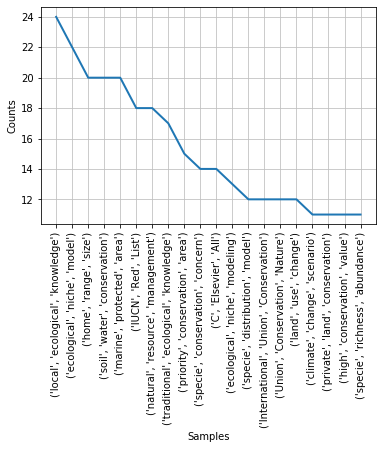

In [36]:
fdist = FreqDist(clean_trigrams)
    
    
fdist.plot(20)

In [37]:
dictionary3 = [' '.join(tup) for tup in clean_trigrams]

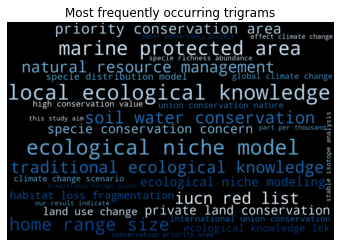

In [38]:
#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary3)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 30
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,colormap="Blues") #,stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring trigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_trigram.jpg')

# How can I investigate methodology?

In [39]:
theories=[]

for trigram in clean_trigrams:
    if 'theory' in trigram:
        theories.append(trigram)
Counter(theories)

#This helps me see what theories have been mentioned in the sample of 1,000 abstracts

Counter({('resource', 'affect', 'theory'): 1,
         ('affect', 'theory', 'new'): 1,
         ('theory', 'new', 'materialism'): 1,
         ('In', 'order', 'theory'): 1,
         ('order', 'theory', 'ecological'): 1,
         ('theory', 'ecological', 'water'): 1,
         ('rational', 'coordination', 'theory'): 1,
         ('coordination', 'theory', 'paper'): 1,
         ('theory', 'paper', 'studied'): 1,
         ('hierarchical', 'organization', 'theory'): 1,
         ('organization', 'theory', 'conceptual'): 1,
         ('theory', 'conceptual', 'framework'): 1,
         ('paper', 'take', 'theory'): 1,
         ('take', 'theory', 'circular'): 1,
         ('theory', 'circular', 'economy'): 1,
         ('test', 'ecological', 'theory'): 1,
         ('ecological', 'theory', 'natural'): 1,
         ('theory', 'natural', 'ecosystem'): 1,
         ('implication', 'ecosystem', 'theory'): 1,
         ('ecosystem', 'theory', 'conservation'): 1,
         ('theory', 'conservation', 'policy'): 1

# Creating a .gif of the bigram and trigram wordcloud

In [42]:
from pathlib import Path
import imageio
image_path = Path('source_images')
images = list(image_path.glob('*.jpg'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

In [43]:
imageio.mimwrite('animated_from_images.gif', image_list, fps=1, duration=25)

In [44]:
#This created a super fast transition between the two images, but it's too fast. I changed the fps and duration to show one image eveery 25 seconds

# Latent Dirichlet Analysis (LDA)

Topic modelling discovers topics within a collection of documents. LDA is a specific topic model that classifies the text within a document into topics.

Latent Dirichlet Analysis with abstracts will look at all of the clean tokens and identify like words or phrases


In [7]:
from nltk.corpus import brown
from nltk.corpus import stopwords

import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS

from pprint import pprint
from collections import Counter, defaultdict

nlp = spacy.load('en_core_web_sm')

In [46]:
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them. 
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)
    
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

In [47]:
nlp.add_pipe(lemmatizer,name='lemmatizer',after='ner')
nlp.add_pipe(remove_stopwords, name="stopwords", last=True)

In [48]:
doc_list = []

# Iterates through each article in the corpus.
for doc in word_dat : #Reminder that word_dat is a list of the 1000 abstracts as text strings
    # Passes that abstract through the pipeline and adds to a new list.
    pr = nlp(doc)
    doc_list.append([t.lower() for t in pr if t.isalpha()])

In [49]:
# Create a mapping of word IDs to words.
words = corpora.Dictionary(doc_list)

# Turns each document into a bag of words.
corpus = [words.doc2bow(doc) for doc in doc_list]

# Topic Modeling with Bigrams and Trigrams



In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(word_dat))

len(data_words)

1000

In [15]:
## Working with bigrams and trigrams

bigram2 = gensim.models.Phrases(data_words, min_count=5,threshold=100)
trigram = gensim.models.Phrases(bigram2[data_words],threshold=100)

bigram_mod= gensim.models.phrases.Phraser(bigram2)

trigram_mod=gensim.models.phrases.Phraser(trigram)

 #trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['all', 'animals', 'must', 'select', 'sites', 'to', 'rest', 'and', 'may', 'spend', 'large', 'portion', 'of', 'their', 'lives', 'doing_so', 'despite', 'the', 'importance', 'of', 'this', 'period', 'in', 'their', 'daily', 'activity', 'budget', 'we', 'lack', 'information', 'about', 'rest', 'roost', 'ecology', 'for', 'most', 'animals', 'including', 'the', 'imperiled', 'lesser_prairie_chicken', 'tympanuchus', 'pallidicinctus', 'hereafter', 'lepc', 'therefore', 'we', 'sought', 'to', 'identify', 'how', 'landcover', 'anthropogenic', 'features', 'and', 'human', 'policy', 'presence', 'of', 'the', 'conservation', 'reserve', 'program', 'crp', 'influenced', 'roost', 'site_selection', 'and', 'movement', 'patterns', 'of', 'the', 'lepc', 'from', 'march', 'to', 'may', 'we', 'captured', 'and', 'fitted', 'gps', 'transmitters', 'to', 'lepcs', 'males', 'females', 'within', 'beaver', 'county', 'oklahoma', 'and', 'recorded', 'two', 'nocturnal', 'locations', 'per', 'hour', 'period', 'annually', 'we', 'used', '

In [16]:
# # Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
     return [[word for word in simple_preprocess(str(doc)) if word not in sw] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [22]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


#data_words_bigrams[0]

In [24]:
# # Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


#data_lemmatized = []

# # # Iterates through each article in the corpus.
#for doc in data_words_bigrams : #Reminder that word_dat is a list of the 1000 abstracts as text strings
#    Passes that abstract through the pipeline and adds to a new list.
   # pr = nlp(str(doc))
   # data_lemmatized.append([t.lower() for t in pr]) #####LEFT OUT is.alpha(), IT TAKES AWAY BIGRAMS FOR HAVING UNDERSCORE



print(data_lemmatized[0])

['animal', 'must', 'select', 'site', 'rest', 'may', 'spend', 'large', 'portion', 'life', 'importance', 'period', 'daily', 'activity', 'budget', 'lack', 'information', 'rest', 'roost', 'ecology', 'animal', 'include', 'imperil', 'chicken', 'pallidicinctus', 'hereafter', 'lepc', 'therefore', 'seek', 'identify', 'landcover', 'feature', 'human', 'policy', 'presence', 'conservation', 'reserve', 'program', 'roost', 'movement', 'pattern', 'lepc', 'may', 'capture', 'fit', 'transmitter', 'male', 'female', 'record', 'nocturnal', 'location', 'hour', 'period', 'annually', 'use', 'discrete', 'choice', 'model', 'generalized_linear', 'mixed', 'effect', 'model', 'determine', 'cover', 'patch', 'feature', 'influence', 'roost', 'movement', 'roosting', 'site', 'respectively', 'find', 'roost', 'site', 'close', 'crp', 'cropland', 'would', 'expect', 'random', 'conversely', 'roost', 'site', 'locate', 'farther', 'away', 'shortgrass', 'prairie', 'road', 'transmission', 'line', 'expect', 'probability', 'lepc', 'r

In [55]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
#print(corpus[:1])

In [45]:


# Build LDA model
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
pprint(lda_model_2.print_topics(num_words=10))

[(0,
  '0.028*"conservation" + 0.021*"ecological" + 0.013*"use" + 0.011*"area" + '
  '0.009*"management" + 0.009*"biodiversity" + 0.007*"study" + '
  '0.007*"ecosystem" + 0.006*"land" + 0.006*"approach"'),
 (1,
  '0.043*"specie" + 0.015*"habitat" + 0.010*"population" + 0.009*"use" + '
  '0.009*"conservation" + 0.008*"study" + 0.008*"area" + 0.008*"distribution" '
  '+ 0.007*"high" + 0.007*"plant"'),
 (2,
  '0.011*"population" + 0.009*"wild" + 0.008*"wildlife" + 0.007*"knowledge" + '
  '0.007*"elephant" + 0.007*"fisher" + 0.006*"fishery" + 0.006*"local" + '
  '0.005*"predator" + 0.005*"livestock"'),
 (3,
  '0.023*"conservation" + 0.013*"research" + 0.011*"knowledge" + '
  '0.010*"ecology" + 0.008*"wildlife" + 0.008*"community" + 0.007*"social" + '
  '0.007*"science" + 0.006*"practice" + 0.006*"understand"')]


In [54]:
##Visualizing

# pyLDAvis.enable_notebook()
# pyLDAvis.gensim.prepare(lda_model_2, corpus, id2word)

C:\Users\maddo\AnacondaInstall\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.169458 -0.030037       1        1  49.466080
1      0.114280  0.162211       2        1  31.040230
3     -0.024410 -0.203150       3        1  14.045737
2     -0.259327  0.070977       4        1   5.447952, topic_info=    Category         Freq          Term        Total  loglift  logprob
167  Default  2045.000000        specie  2045.000000  30.0000  30.0000
13   Default  2785.000000  conservation  2785.000000  29.0000  29.0000
481  Default   572.000000    population   572.000000  28.0000  28.0000
426  Default   496.000000      research   496.000000  27.0000  27.0000
136  Default   848.000000       habitat   848.000000  26.0000  26.0000
..       ...          ...           ...          ...      ...      ...
38    Topic4    30.093401         human   405.709778   0.3086  -5.5296
852   Topic4    22.469336       density    80.643791   1.6320  -5.8217
851   Topic4    24.397457       decline   160.671616   1.0250  -5.7394
132   Topic4    22.839632          fish   172.215240   0.8897  -5.8054
167   Topic4    25.322119        specie  2045.029907  -1.4816  -5.7022

[283 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
438       2  0.897004  abundance
438       4  0.097175  abundance
642       1  0.994231    achieve
1402      1  0.244873      actor
1402      3  0.752111      actor
...     ...       ...        ...
915       4  0.938461       wolf
2406      3  0.979544      woman
324       1  0.342308       work
324       2  0.108537       work
324       3  0.542683       work

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [47]:
##Evaluating the model

# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)


Perplexity:  -7.6079018607011655

Coherence Score:  0.3719135562911602


In [48]:
lda_model_3=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model_3.print_topics(num_words=20))

[(0,
  '0.028*"conservation" + 0.024*"ecological" + 0.015*"use" + 0.012*"area" + '
  '0.010*"biodiversity" + 0.010*"management" + 0.008*"study" + '
  '0.008*"ecosystem" + 0.007*"forest" + 0.007*"landscape" + 0.007*"land" + '
  '0.006*"identify" + 0.006*"model" + 0.006*"change" + 0.006*"approach" + '
  '0.006*"base" + 0.005*"result" + 0.005*"provide" + 0.005*"protect" + '
  '0.005*"impact"'),
 (1,
  '0.048*"specie" + 0.016*"habitat" + 0.011*"population" + '
  '0.009*"distribution" + 0.008*"study" + 0.008*"use" + 0.008*"area" + '
  '0.008*"plant" + 0.007*"high" + 0.006*"conservation" + 0.006*"range" + '
  '0.006*"niche" + 0.005*"community" + 0.005*"forest" + 0.005*"site" + '
  '0.005*"datum" + 0.005*"diversity" + 0.005*"genetic" + 0.004*"bird" + '
  '0.004*"model"'),
 (2,
  '0.018*"population" + 0.012*"specie" + 0.012*"wild" + 0.007*"fish" + '
  '0.007*"predator" + 0.007*"fisher" + 0.006*"prey" + 0.006*"fishery" + '
  '0.005*"animal" + 0.005*"carnivore" + 0.005*"livestock" + 0.004*"shark

In [57]:
##Evaluating the model

# Compute Perplexity
print('\nPerplexity: ', lda_model_3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_3 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_3)


Perplexity:  -7.616885402468258

Coherence Score:  0.3575420332133166


In [83]:
#Code for saving a visualization
# pyLDAvis.enable_notebook()
# visualization=pyLDAvis.gensim.prepare(lda_model_7, corpus, id2word)
# pyLDAvis.save_html(visualization, 'LDAModel_k7.html')

# Evaluating models for correct topic number:


In [51]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

# Using Gensim Tutorial



In [33]:
from gensim.corpora import Dictionary

def display_topics(model, features, no_top_words=5):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   word_vector[largest[i]]*100.0/total))

In [25]:
dict_gensim_abs = Dictionary(data_lemmatized)



In [50]:
#words must appear in at least 5 documents and no more than 80%
dict_gensim_abs.filter_extremes(no_below=5, no_above=0.7)

In [51]:
#Calculates bag of words matrix
bow_gensim_abs = [dict_gensim_abs.doc2bow(w) \
                   for w in data_lemmatized]

In [52]:
#TF-IDF transformation
from gensim.models import TfidfModel
tfidf_gensim_abs = TfidfModel(bow_gensim_abs)
vectors_gensim_abs = tfidf_gensim_abs[bow_gensim_abs]

In [55]:
#single model
# from gensim.models import LdaModel
# lda_gensim_abs = LdaModel(corpus=bow_gensim_abs, id2word=dict_gensim_abs,
# chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=10,
# passes=20, eval_every=None, random_state=42)

In [42]:
#lda_gensim_abs.show_topics()

## Identifying optimal number of topics

In [85]:
##Coherence for topics 5 through 21

from gensim.models.ldamulticore import LdaMulticore
from tqdm import trange, notebook
#import tqdm as tqdm
lda_para_model_n = []
for n in trange(5, 21):
    lda_model = LdaMulticore(corpus=bow_gensim_abs, id2word=dict_gensim_abs,
                             chunksize=2000, eta='auto', iterations=400,
                             num_topics=n, passes=100, eval_every=None,
                             random_state=42)
    lda_coherence = CoherenceModel(model=lda_model, texts=data_lemmatized,
                                   dictionary=dict_gensim_abs, coherence='c_v')
    lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [53:54<00:00, 202.14s/it]


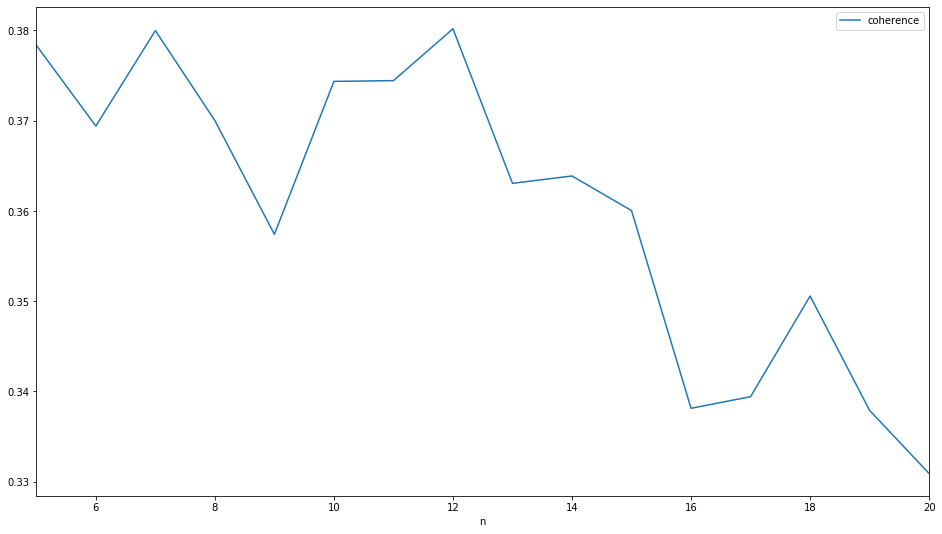

In [86]:
pd.DataFrame(lda_para_model_n, columns=["n", "model", \
"coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))

In [87]:
#trying different topic range, 3 to 14
lda_para_model_n = []
for n in trange(3, 14):
    lda_model = LdaMulticore(corpus=bow_gensim_abs, id2word=dict_gensim_abs,
                             chunksize=2000, eta='auto', iterations=400,
                             num_topics=n, passes=100, eval_every=None,
                             random_state=42)
    lda_coherence = CoherenceModel(model=lda_model, texts=data_lemmatized,
                                   dictionary=dict_gensim_abs, coherence='c_v')
    lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [22:47<00:00, 124.27s/it]


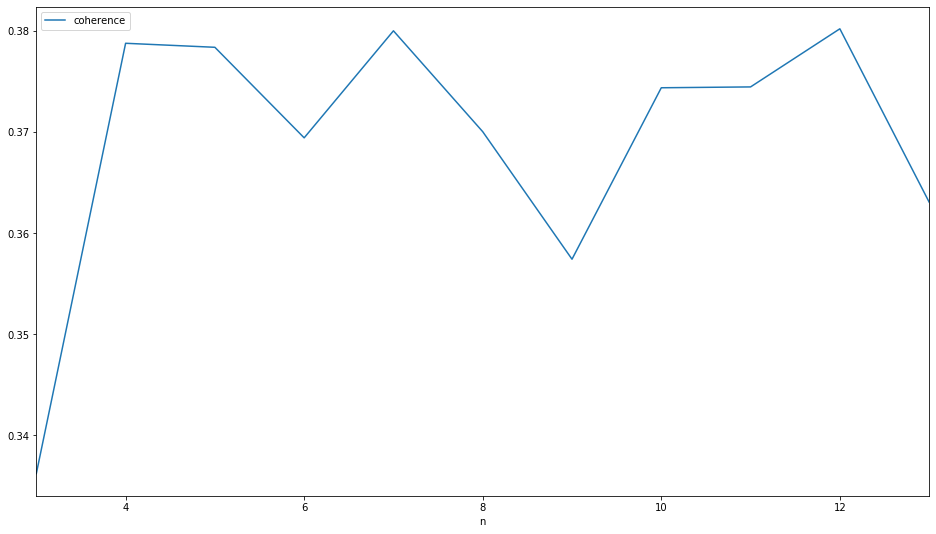

In [88]:
pd.DataFrame(lda_para_model_n, columns=["n", "model", \
"coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))

Since there are peaks at 7 topics and 12 topics, I will be visualizing both of these to see more about the differences and similarities between them

## Visualizing at 5 and 11 topics

In [89]:
lda_7_topics= LdaModel(corpus=bow_gensim_abs, id2word=dict_gensim_abs,
                       chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=7,
                       passes=100, eval_every=None, random_state=42)
lda_12_topics= LdaModel(corpus=bow_gensim_abs, id2word=dict_gensim_abs,
                       chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=12,
                       passes=100, eval_every=None, random_state=42)

In [90]:
lda_7_topics.show_topics()

[(0,
  '0.023*"forest" + 0.013*"use" + 0.011*"biodiversity" + 0.011*"study" + 0.010*"ecosystem" + 0.009*"water" + 0.009*"restoration" + 0.008*"landscape" + 0.008*"change" + 0.007*"management"'),
 (1,
  '0.024*"use" + 0.022*"land" + 0.019*"area" + 0.013*"landscape" + 0.010*"spatial" + 0.009*"result" + 0.009*"urban" + 0.009*"model" + 0.009*"method" + 0.009*"development"'),
 (2,
  '0.043*"specie" + 0.014*"habitat" + 0.014*"population" + 0.013*"use" + 0.012*"area" + 0.010*"distribution" + 0.010*"study" + 0.009*"high" + 0.007*"model" + 0.007*"species"'),
 (3,
  '0.021*"area" + 0.017*"management" + 0.015*"protect" + 0.013*"fish" + 0.013*"marine" + 0.012*"biodiversity" + 0.009*"impact" + 0.009*"ecosystem" + 0.008*"use" + 0.007*"identify"'),
 (4,
  '0.009*"human" + 0.009*"increase" + 0.009*"study" + 0.008*"factor" + 0.008*"may" + 0.008*"wildlife" + 0.008*"ecology" + 0.007*"population" + 0.007*"management" + 0.007*"behavior"'),
 (5,
  '0.021*"knowledge" + 0.018*"local" + 0.016*"wildlife" + 0.01

In [91]:
lda_12_topics.show_topics()

[(5,
  '0.037*"movement" + 0.016*"specie" + 0.014*"population" + 0.013*"stream" + 0.012*"river" + 0.011*"value" + 0.010*"fish" + 0.010*"animal" + 0.009*"high" + 0.008*"objective"'),
 (6,
  '0.029*"network" + 0.019*"habitat" + 0.017*"area" + 0.016*"landscape" + 0.013*"genetic" + 0.012*"regional" + 0.012*"protect" + 0.010*"specie" + 0.009*"patch" + 0.009*"population"'),
 (4,
  '0.020*"wildlife" + 0.012*"human" + 0.011*"ecology" + 0.011*"forage" + 0.010*"wild" + 0.010*"livestock" + 0.009*"population" + 0.009*"may" + 0.007*"study" + 0.007*"behavior"'),
 (3,
  '0.024*"area" + 0.024*"fish" + 0.023*"marine" + 0.020*"management" + 0.013*"fishing" + 0.013*"protect" + 0.012*"coastal" + 0.012*"fishery" + 0.012*"mpa" + 0.010*"community"'),
 (1,
  '0.028*"use" + 0.025*"area" + 0.019*"land" + 0.015*"planning" + 0.014*"spatial" + 0.012*"urban" + 0.011*"identify" + 0.011*"priority" + 0.011*"approach" + 0.010*"landscape"'),
 (9,
  '0.014*"policy" + 0.014*"biodiversity" + 0.013*"social" + 0.010*"develop

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5,
max_df=0.7)
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
            wc = WordCloud(background_color="white", max_words=100,
                           width=960, height=540)
            wc.generate_from_frequencies(size)
            plt.figure(figsize=(12,12))
            plt.imshow(wc, interpolation='bilinear')
            plt.axis("off")
            # if you don't want to save the topic model, comment the next line
            plt.savefig(f'topic{topic}.png')

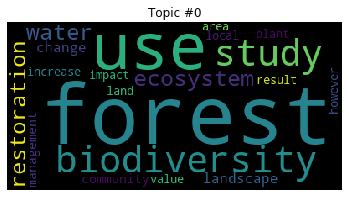

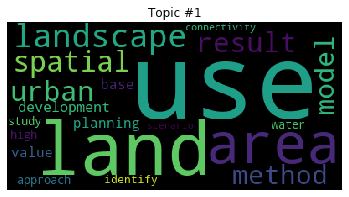

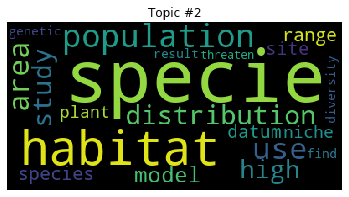

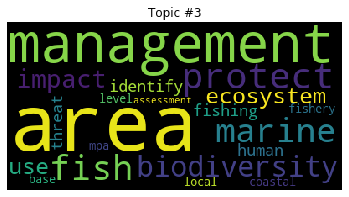

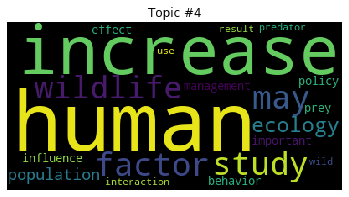

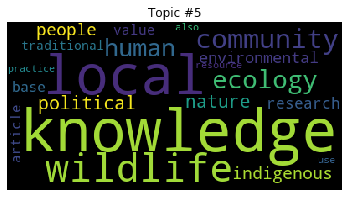

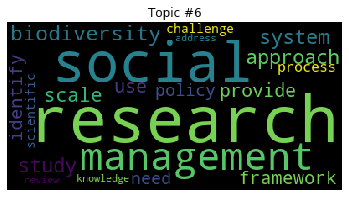

In [92]:
#Wordclouds for 7 topics
for t in range(lda_7_topics.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_7_topics.show_topic(t, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

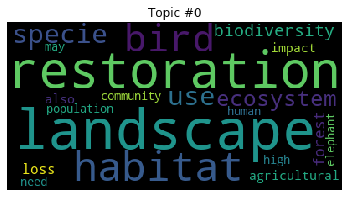

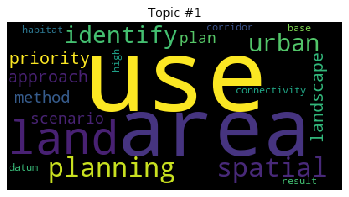

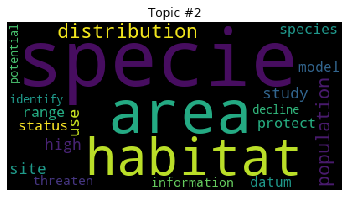

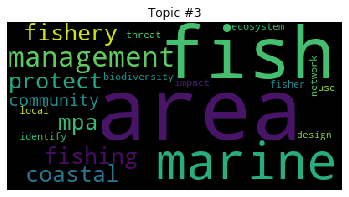

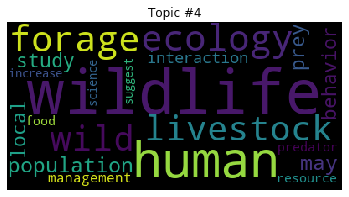

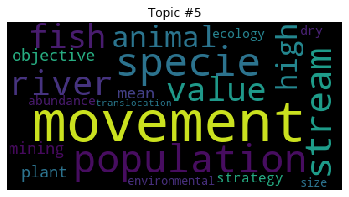

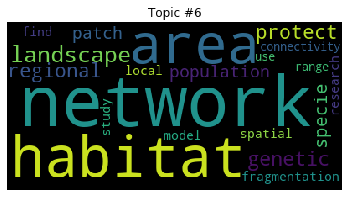

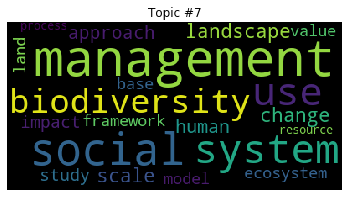

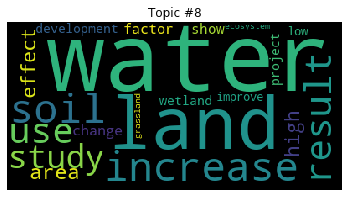

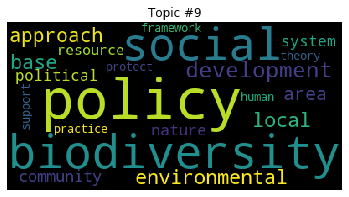

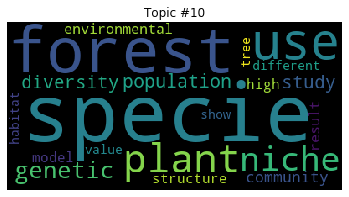

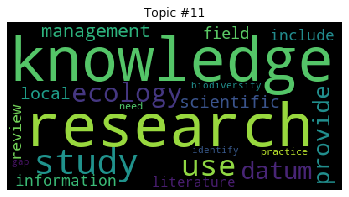

In [93]:
#Wordclouds for 12 topics
for t in range(lda_12_topics.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_12_topics.show_topic(t, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [94]:
#Code for saving a visualization
pyLDAvis.enable_notebook()
visualization=pyLDAvis.gensim.prepare(lda_7_topics, bow_gensim_abs, dict_gensim_abs)


C:\Users\maddo\AnacondaInstall\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [95]:
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.102539 -0.042069       1        1  31.212278
6     -0.056734  0.111509       2        1  15.843527
0      0.014913 -0.033406       3        1  15.083628
1      0.135400  0.023389       4        1  11.705644
3      0.062518  0.085794       5        1  11.223174
4     -0.046672 -0.170446       6        1   7.663340
5     -0.211965  0.025228       7        1   7.268408, topic_info=    Category         Freq       Term        Total  loglift  logprob
136  Default  1619.000000     specie  1619.000000  30.0000  30.0000
448  Default   556.000000     forest   556.000000  29.0000  29.0000
300  Default   430.000000       land   430.000000  28.0000  28.0000
396  Default   420.000000  knowledge   420.000000  27.0000  27.0000
425  Default   221.000000   wildlife   221.000000  26.0000  26.0000
..       ...          ...        ...          ...      ...      ...
216   Topic7    37.034813   approach   418.355469   0.1972  -5.3716
81    Topic7    41.552788        use  1287.446167  -0.8118  -5.2565
263   Topic7    36.326084     social   428.932892   0.1529  -5.3909
346   Topic7    31.806068    natural   274.912170   0.4648  -5.5238
1     Topic7    30.054712     animal   120.306892   1.2346  -5.5804

[542 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
371       1  0.951209     abundance
371       4  0.007610     abundance
371       6  0.030439     abundance
371       7  0.007610     abundance
2380      7  0.888327  accumulation
...     ...       ...           ...
425       2  0.022591      wildlife
425       3  0.067774      wildlife
425       6  0.316279      wildlife
425       7  0.591894      wildlife
734       6  0.935526          wolf

[1348 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 1, 2, 4, 5, 6])

In [96]:
pyLDAvis.save_html(visualization, 'LDAModel_7.html')

In [97]:
pyLDAvis.enable_notebook()
visualization2=pyLDAvis.gensim.prepare(lda_12_topics, bow_gensim_abs, dict_gensim_abs)
pyLDAvis.save_html(visualization2, 'LDAModel_12.html')

C:\Users\maddo\AnacondaInstall\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [98]:
visualization2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.131148 -0.011833       1        1  15.671073
7     -0.127320 -0.015561       2        1  12.493002
10     0.122207  0.047810       3        1  12.388776
11    -0.100510  0.021633       4        1  11.869696
9     -0.181580 -0.024962       5        1  10.095723
8      0.020955 -0.108496       6        1   7.483069
1      0.046816 -0.131271       7        1   7.061198
0      0.002596  0.008695       8        1   6.580894
3     -0.051402 -0.090586       9        1   5.902173
4     -0.075968  0.191068      10        1   5.485642
6      0.119009 -0.042062      11        1   2.804843
5      0.094050  0.155564      12        1   2.163908, topic_info=    Category         Freq       Term        Total  loglift  logprob
136  Default  1610.000000     specie  1610.000000  30.0000  30.0000
599  Default   326.000000      water   326.000000  29.0000  29.0000
87   Default  1114.000000       area  1114.000000  28.0000  28.0000
107  Default   646.000000    habitat   646.000000  27.0000  27.0000
448  Default   561.000000     forest   561.000000  26.0000  26.0000
..       ...          ...        ...          ...      ...      ...
162  Topic12    12.028879  ecosystem   410.795471   0.3025  -5.2845
23   Topic12    11.521784       find   299.869995   0.5741  -5.3276
199  Topic12     9.814368   solution    75.730019   1.7899  -5.4880
379  Topic12    10.494390  community   427.227875   0.1268  -5.4210
81   Topic12    10.091174        use  1289.761597  -1.0173  -5.4602

[847 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
371       1  0.654379  abundance
371       3  0.115479  abundance
371       5  0.007699  abundance
371       7  0.015397  abundance
371       9  0.007699  abundance
...     ...       ...        ...
600       2  0.019414      yield
600       3  0.038828      yield
600       6  0.601836      yield
600       7  0.116484      yield
600      12  0.097070      yield

[2816 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 11, 12, 10, 9, 2, 1, 4, 5, 7, 6])